# Description

It projects input data into a UMAP representation.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd

import conf
from utils import generate_result_set_name

# Settings

In [3]:
np.random.seed(0)

## Input data

In [4]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [5]:
INPUT_FILEPATH = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [6]:
# output dir for this notebook
RESULTS_DIR = Path(conf.RESULTS["DATA_TRANSFORMATIONS_DIR"], "umap").resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap')

## UMAP options

In [7]:
# parameters of the dimentionality reduction steps
# note that these are the default parameters of UMAP (metric and n_neighbors)
DR_OPTIONS = {
    "n_components": [5, 10, 20, 30, 40, 50],
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [8]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': [5, 10, 20, 30, 40, 50],
 'metric': 'euclidean',
 'n_neighbors': 15,
 'random_state': 0}

# Load input file

In [9]:
data = pd.read_pickle(INPUT_FILEPATH)

In [10]:
display(data.shape)

(3752, 987)

In [11]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


# UMAP

**Reproducibility problem**: there seems to be a bug with UMAP in which it produces different results in different operating systems or machines: https://github.com/lmcinnes/umap/issues/153

In [12]:
from data.dimreduction import get_umap_proj

In [13]:
# Get a UMAP representation for all n_components configurations
for n_comp in DR_OPTIONS["n_components"]:
    print(f"# components: {n_comp}")

    # prepare options of n_comp
    options = ALL_OPTIONS.copy()
    options["n_components"] = n_comp
    options = {k: v for k, v in options.items() if k in DR_OPTIONS}

    # get projection
    dr_data = get_umap_proj(data, options)

    # check data dimensionality
    display(dr_data.shape)
    assert dr_data.shape == (data.shape[0], n_comp)

    display(dr_data.iloc[:, 0:5].describe())

    # save
    output_file = Path(
        RESULTS_DIR,
        generate_result_set_name(
            options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
        ),
    ).resolve()
    display(output_file)

    dr_data.to_pickle(output_file)

    print("\n")

# components: 5


'UMAP object: UMAP(n_components=5, random_state=0)'

(3752, 5)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,0.493162,1.426116,9.464273,0.161560,4.657347
std,0.893696,1.016217,1.518810,0.575032,1.525796
min,-1.398487,-2.080983,0.411837,-1.348866,1.086893
25%,-0.131836,0.924776,8.155022,-0.287177,3.417390
50%,0.587860,1.267672,9.205188,0.177001,4.696977
75%,1.080782,1.714219,10.911998,0.549059,6.044758
max,12.490383,9.057203,12.298713,2.319096,7.796984


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')



# components: 10


'UMAP object: UMAP(n_components=10, random_state=0)'

(3752, 10)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,0.419366,8.545898,9.481963,9.660532,4.672070
std,0.811938,1.016661,0.633803,0.928355,0.717307
min,-1.013059,1.817594,1.771062,7.432575,2.232122
25%,-0.126183,8.254269,9.154706,8.836735,4.145025
50%,0.453969,8.558639,9.517869,9.659509,4.593541
75%,0.830000,9.100613,9.826716,10.421288,5.264465
max,11.742677,10.149857,10.637177,11.529664,6.850031


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_10-n_neighbors_15-random_state_0.pkl')



# components: 20


'UMAP object: UMAP(n_components=20, random_state=0)'

(3752, 20)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,0.369789,1.451156,9.420328,9.840447,5.334801
std,0.608103,0.807185,0.642326,0.496432,0.253938
min,-0.775402,0.093888,0.636580,8.355833,4.486931
25%,0.062912,1.177943,9.098334,9.386060,5.187095
50%,0.423331,1.283858,9.473834,9.941889,5.315128
75%,0.584980,1.560583,9.818474,10.213129,5.469644
max,11.533111,8.355176,10.403874,10.844026,6.699657


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_20-n_neighbors_15-random_state_0.pkl')



# components: 30


'UMAP object: UMAP(n_components=30, random_state=0)'

(3752, 30)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,9.654895,8.429644,9.370734,9.690788,4.629640
std,0.636872,0.978074,0.526961,0.408312,0.202670
min,-2.604030,1.986799,1.008471,8.669964,3.884584
25%,9.434828,7.864619,9.186150,9.354642,4.466325
50%,9.700889,8.608184,9.425408,9.681272,4.638577
75%,9.915643,9.074326,9.587519,10.002031,4.786352
max,10.321830,9.694255,10.335933,10.801014,5.326066


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_30-n_neighbors_15-random_state_0.pkl')



# components: 40


'UMAP object: UMAP(n_components=40, random_state=0)'

(3752, 40)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,0.409798,1.530681,0.587186,0.285504,5.389903
std,0.620245,0.723611,0.535950,0.694589,0.138719
min,-0.261371,-0.183488,-0.046474,-1.093163,4.459216
25%,0.219515,1.278606,0.330732,-0.359109,5.295848
50%,0.378083,1.403147,0.578233,0.414177,5.375280
75%,0.568840,1.634806,0.789792,0.907387,5.474735
max,12.928990,7.691243,8.705194,1.935609,5.825169


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_40-n_neighbors_15-random_state_0.pkl')



# components: 50


'UMAP object: UMAP(n_components=50, random_state=0)'

(3752, 50)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,9.684153,8.509004,9.509526,9.689566,4.571850
std,0.468031,0.861318,0.479266,0.633767,0.096438
min,-0.260330,2.145346,1.531774,8.230055,4.304045
25%,9.662971,8.147703,9.426739,9.124230,4.499036
50%,9.706996,8.554929,9.535625,9.622990,4.576935
75%,9.746474,9.072538,9.650263,10.306693,4.634654
max,10.200955,10.085360,9.903102,10.797185,5.127590


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

## Plots

In [14]:
import seaborn as sns

Plot the data from the UMAP version with 5 components.

In [15]:
# prepare options of 5 components
options = ALL_OPTIONS.copy()
options["n_components"] = 5
options = {k: v for k, v in options.items() if k in DR_OPTIONS}

# load
input_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

dr_data = pd.read_pickle(input_file)

## Full plot

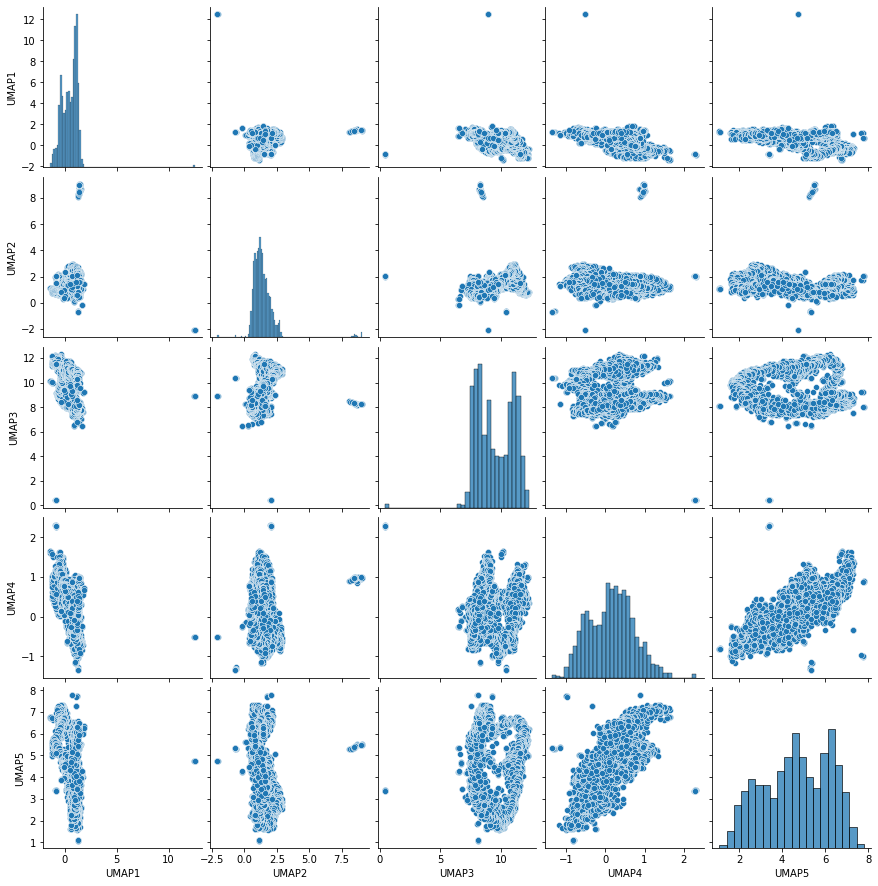

In [16]:
g = sns.pairplot(data=dr_data)

## Full plot (density)

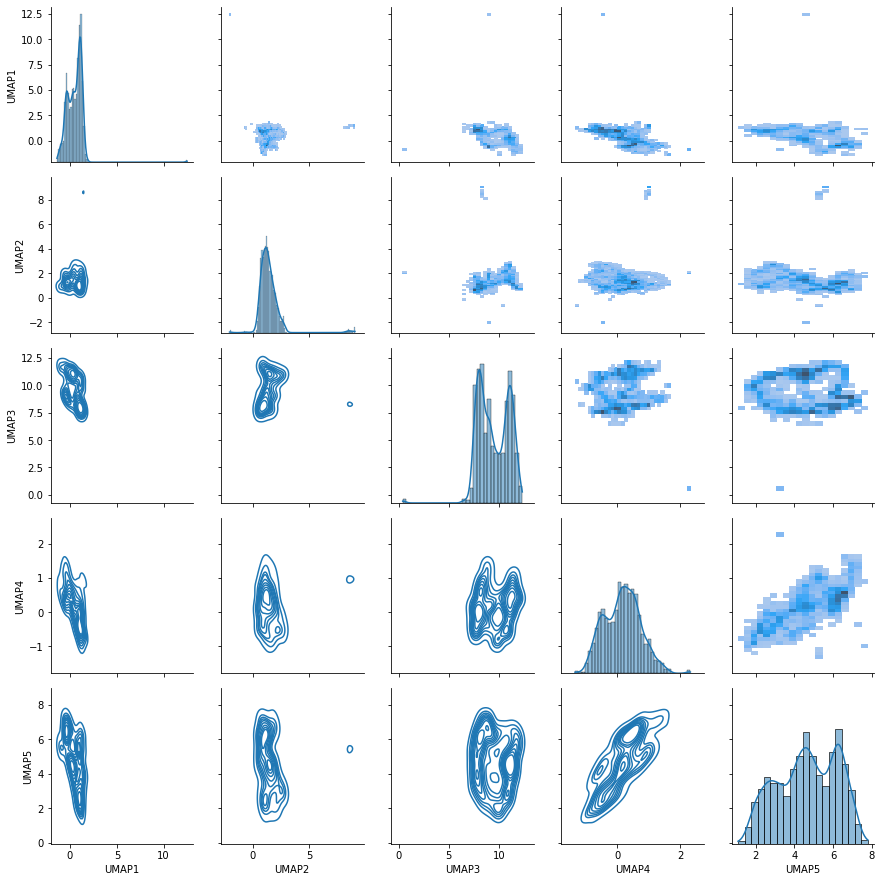

In [19]:
g = sns.PairGrid(data=dr_data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)

## Density plot without "outliers"

In [21]:
# remove "outliers" just to take a look at the big cluster
dr_data_thin = dr_data[(dr_data["UMAP1"] < 10) & (dr_data["UMAP2"] < 5)]

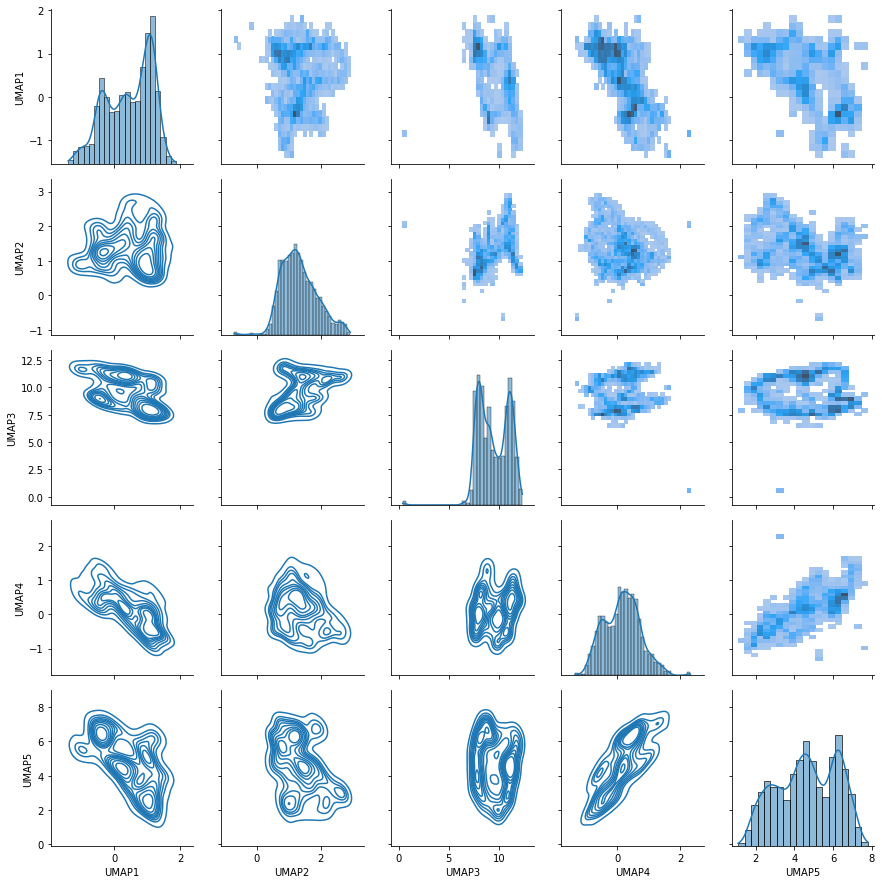

In [22]:
g = sns.PairGrid(data=dr_data_thin)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)